🎯 Desafio dia 79 — Acompanhamento de Pacientes em Clínica

📂 Dataset: desafio_dia_79_consultas_clinica.csv
📥 Clique aqui para baixar o CSV

🔍 Contexto: Você está trabalhando com dados de uma clínica médica que deseja analisar o comportamento dos pacientes em relação às consultas agendadas. As informações incluem especialidade, gênero, idade, tempo de espera e status da consulta.

🛠️ Tarefas do desafio:

🧹 Tratamento de dados
- Preencha os valores ausentes da coluna dias_espera com a mediana.

- Preencha os valores ausentes da coluna genero com o valor mais frequente.

📊 Análise geral
- Qual especialidade tem mais cancelamentos?

- Qual é a idade média dos pacientes que faltaram às consultas?

📈 Visualização de dados
- Crie um gráfico de barras mostrando a contagem de consultas por especialidade, separadas por status_consulta.

🤖 Machine Learning - Classificação
- Crie um modelo para prever o status_consulta com base nas colunas:

    idade, dias_espera, especialidade e genero

    Use train_test_split, get_dummies, RandomForestClassifier e avalie com accuracy_score.



In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("desafio_dia_79_consultas_clinica.csv")
df.head()

,id_consulta,especialidade,genero,idade,dias_espera,status_consulta
0,8001,Ortopedia,Masculino,48,8.0,Compareceu
1,8002,Pediatria,Masculino,45,29.0,Cancelou
2,8003,Dermatologia,Feminino,48,17.0,Compareceu
3,8004,Clínico Geral,Masculino,36,13.0,Compareceu
4,8005,Ortopedia,Feminino,54,1.0,Compareceu


In [3]:
#Preencha os valores ausentes da coluna dias_espera com a mediana.
df["dias_espera"] = df["dias_espera"].fillna(df["dias_espera"].median())
df["dias_espera"].isna().sum()

0

In [4]:
#Preencha os valores ausentes da coluna genero com o valor mais frequente.
df["genero"] = df["genero"].fillna(df["genero"].mode()[0])
df["genero"].isna().sum()

0

In [19]:
#Qual especialidade tem mais cancelamentos?
cancelou = df[df["status_consulta"] == "Cancelou"]
especialidade_cancelamentos = cancelou.groupby("status_consulta")["especialidade"].value_counts().sort_values(ascending=False)
print(especialidade_cancelamentos)

status_consulta  especialidade
Cancelou         Pediatria        21
                 Dermatologia     18
                 Clínico Geral    15
                 Ortopedia        15
                 Cardiologia      13
Name: count, dtype: int64


In [18]:
#Qual é a idade média dos pacientes que faltaram às consultas?
faltou = df[df["status_consulta"] == "Faltou"]
idade_media_faltaram = faltou.groupby("status_consulta")["idade"].mean()
print(idade_media_faltaram)

status_consulta
Faltou    39.892857
Name: idade, dtype: float64


Text(0.5, 0, 'Especialidade')

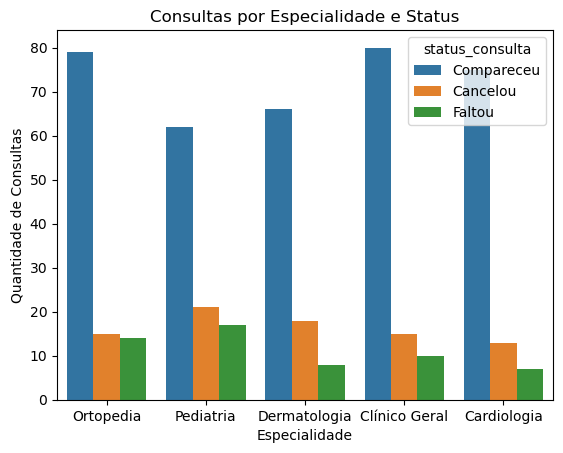

In [28]:
#Crie um gráfico de barras mostrando a contagem de consultas por especialidade, separadas por status_consulta.
sns.countplot(data=df, x="especialidade", hue="status_consulta")
plt.title("Consultas por Especialidade e Status")
plt.ylabel("Quantidade de Consultas")
plt.xlabel("Especialidade")

In [36]:
#Crie um modelo para prever o status_consulta com base nas colunas:
X = df[["idade", "dias_espera", "especialidade", "genero"]]
y = df["status_consulta"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.68
